# Week 10 Assignment

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prompt:" data-toc-modified-id="Prompt:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prompt:</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(Part-I)" data-toc-modified-id="Exploratory-Data-Analysis-(Part-I)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis (Part I)</a></span><ul class="toc-item"><li><span><a href="#Load-dataframe" data-toc-modified-id="Load-dataframe-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load dataframe</a></span></li><li><span><a href="#Add-std-and-mean" data-toc-modified-id="Add-std-and-mean-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Add std and mean</a></span></li></ul></li><li><span><a href="#Graphics-(Part-II)" data-toc-modified-id="Graphics-(Part-II)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Graphics (Part II)</a></span></li><li><span><a href="#Clustering-(Part-III)" data-toc-modified-id="Clustering-(Part-III)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clustering (Part III)</a></span><ul class="toc-item"><li><span><a href="#Split-and-apply-standard-scalar" data-toc-modified-id="Split-and-apply-standard-scalar-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Split and apply standard scalar</a></span></li><li><span><a href="#Build-Silhouette-and-Inertia-Score-dataframe" data-toc-modified-id="Build-Silhouette-and-Inertia-Score-dataframe-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Build Silhouette and Inertia Score dataframe</a></span></li><li><span><a href="#Take-best-silhouette-score" data-toc-modified-id="Take-best-silhouette-score-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Take best silhouette score</a></span></li></ul></li><li><span><a href="#Final-Script" data-toc-modified-id="Final-Script-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final Script</a></span></li><li><span><a href="#Readme" data-toc-modified-id="Readme-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Readme</a></span></li></ul></div>

## Prompt:

You are the newest member of the Atreides Lab. Their postdoc, Paul, had recently left and you are in charge of taking over the latest analysis.

Paul was collaborating with another lab and received clinical data from their team. He identified the bacteria present in the microbiome of 50 samples and calculated the taxonomic diversity for each sample.
His analyses outputted into two folders: one filled with diversity scores, and another with the final output of his distance matrices.

Your task:

1) Read in the data clinical file (clinical_data.txt) as a dataframe and create two new columns called averages and std. You will read in each sample's diversity score list (found in diversityScores) and append the mean value and the standard deviation of the sample's diversity score. Then output the new clinical data (which includes the original clinical information from clinical_data.txt along with the two new columns to a file called clinical_data.stats.txt.)

This should be done using pandas and numpy python package.

2) Then find the animals (code names) that correspond with the two highest average diversity scores and one with the lowest average diversity score (three animals in total).  Find their respective txt file inside the distanceFiles directory and plot and save a scatter plot for each animal (three plots in total, and can be saved as png files). Add a title for each plot that has the animal's name in it.

Extra credit. Perform k-means on the three plots and color them by cluster. K-means is a very common algorithm to find patterns in a dataset. In our case we want to see if clustering our scatterplot reveals a biological meaning for our samples.
Use the elbow method to find the appropriate number of clusters (even though it may be very easy to see by eye).

K-means is a very common algorithm to find patterns in a dataset. In our case we want to see if clustering our scatterplot reveals a biological meaning for our samples (different species of bacteria in the microbiome).

You can use the following resources below to help you. The code for this should be in the same python script as the rest of the assignment. Feel free to make use of the scipy function for k-means (I'm not expecting you to write the code for k-means, just implement it). 

What is Kmeans and when would we use it? https://www.datascience.com/blog/k-means-clustering

Code for k-means: https://mubaris.com/posts/kmeans-clustering/
Code for elbow plot: https://pythonprogramminglanguage.com/kmeans-elbow-method/



Requirements
Input files:
You will find all necessary input files here: /home/rbif/week10/inputfiles

Expected output:
clinical_data.stats.txt
3 plots with a title of the {animal}, and saved as {animal}.pdf
your python script
a readme

All of the above steps should be contained in a single python script.
You can use either matplotlib or seaborn to plot the data.

Your code is expected to work independent of the data clinical file. For example, if I gave another file with a completely different set of animal names, your code should work without any issues.

Please make use of the Questions and Answers forum if anything is unclear. If you need help with your code, please provide the path on the AWS to your code. 

## Libraries

Common Libraries used in this task

In [157]:
# Data Analytics
import numpy as np
import pandas as pd

# Ploting Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Clustering Libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

plt.style.use('fivethirtyeight')

%matplotlib inline

## Exploratory Data Analysis (Part I)

### Load dataframe

In [46]:
df = pd.read_csv("./inputfiles/clinical_data.txt", sep='\t')

In [47]:
df.head()

,Discoverer,Location,Diamater (mm),Environment,Status,code_name
0,Kerr,New Jersey,68,River,Sequenced,addax
1,Schacher,Sweden,44,Sewage,Sequenced,badger
2,No,Florida,6,River,Sequenced,basilisk
3,Farrior,New Jersey,75,River,Sequenced,bat
4,Look,Florida,66,Sewage,Sequenced,bear


### Add std and mean

Let's see if I can do with with a lambda

In [48]:
clinical_file = "./inputfiles/"

def stats(clinical_file, codename):
    data = clinical_file + "/diversityScores/{}.diversity.txt".format(codename)
    text_list = open(data).readlines()
    data_list = [float(x) for x in text_list]
    
    mean = np.mean(data_list)
    std = np.std(data_list)
    
    return [mean, std] 

stats(clinical_file, "basilisk")

[7.345858333333334, 4.452870152676499]

In [55]:
df["mean"] = df["code_name"].apply(lambda a: stats(clinical_file, a)[0])
df["std"] = df["code_name"].apply(lambda a: stats(clinical_file, a)[1])

## Graphics (Part II)

Get top two mean values

In [85]:
sorted(df["mean"].tolist())[-2:]

[22.379341666666665, 25.099075]

We could use idmax, but not as clean

In [62]:
df.loc[df["mean"].idxmax()]

Discoverer       Vanderburg
Location             Sweden
Diamater (mm)            26
Environment           River
Status            Sequenced
code_name               fox
mean                25.0991
std                 2.91054
Name: 21, dtype: object

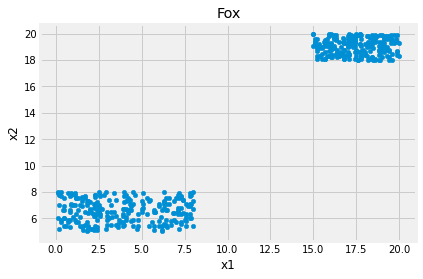

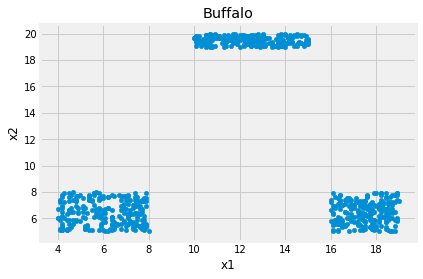

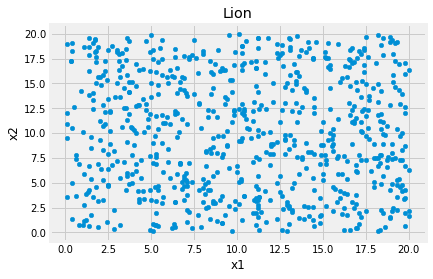

In [147]:
def analysis(clinical_file, df):
        """
        Finds and plots first, second, and last place animal information
        """
        # Sort list and grab values
        sorted_mean_list =  sorted(df["mean"].tolist())
        first_place  = sorted_mean_list[-1]
        second_place = sorted_mean_list[-2]
        last_place   = sorted_mean_list[0]

        animal_dataframes = []
        for place in [first_place, second_place, last_place]:
            # Grab animal name from dataframe
            animal = df[df["mean"] == place]["code_name"].values[0]

            # Convert txt files to float list
            animal_text = clinical_file + "/distanceFiles/{}.distance.txt".format(animal)
            animal_data = pd.read_csv(animal_text, header=None).rename(columns={0: 'x1', 1: 'x2'})
            
            # Plot Values
            animal_data.plot(kind='scatter', x='x1', y='x2', title = animal.title())
            plt.savefig( '{}{}.png'.format(clinical_file, animal), dpi=300)
            
            # Make dataframe for merger
            animal_data["target"] = animal
            animal_dataframes.append(animal_data)
        
        # Concatenate dataframes and reset index
        cluster_animals = pd.concat(animal_dataframes).reset_index(drop=True)
        return cluster_animals

cluster_animals = analysis(clinical_file, df)

## Clustering (Part III)

In [148]:
cluster_animals

,x1,x2,target
0,1.2,7.5,fox
1,3.9,5.7,fox
2,7.8,7.9,fox
3,1.2,6.3,fox
4,7.6,6.3,fox
...,...,...,...
1882,4.5,16.5,lion
1883,18.2,19.9,lion
1884,1.8,17.7,lion
1885,18.1,7.5,lion


### Split and apply standard scalar 

First we are going to have to scale these data before we can effectively cluster. I am not going to cross validate these data since it is outside the scope of this class for an unsupervised learning model like k-means clustering, but it is best practice.

In [151]:
X = cluster_animals.loc[:, ['x1', 'x2']]
y = cluster_animals["target"]

In [152]:
X.head()

,x1,x2
0,1.2,7.5
1,3.9,5.7
2,7.8,7.9
3,1.2,6.3
4,7.6,6.3


In [153]:
y.head()

0    fox
1    fox
2    fox
3    fox
4    fox
Name: target, dtype: object

In [155]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Build Silhouette and Inertia Score dataframe

Might be getting too technical here, but basically, I will be using two basic score systems to test the value of our clustering. First, **inertia** is sum of squared errors for each cluster. Second, I will be looking at the **silhouette score** which measures of how far apart clusters are. For this problem, we will just maximize the silhouette score. Normally we would want to grid search which of these clustering systems would be best, but here we will just make a quick plot. In this particular problem, this type of analysis doesn't really make any sense. We know these data come from three different sets...

In [161]:
scores = []
for k in range(2, 7):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [162]:
score_df

,k,inertia,silhouette
0,2,1831.254766,0.489930
1,3,830.346825,0.589380
2,4,576.785005,0.574318
3,5,469.516972,0.538698
4,6,372.596285,0.472514


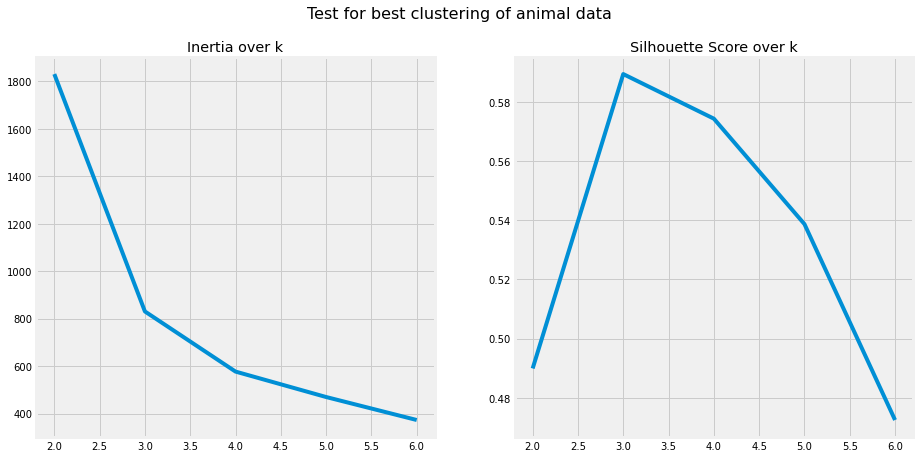

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7));
fig.suptitle('Test for best clustering of animal data', fontsize=16)
axes[0].plot(score_df.k, score_df.inertia);
axes[0].set_title('Inertia over k');
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k');
plt.savefig( 'best-clustering.png', dpi=300)

### Take best silhouette score

In [175]:
best_silhoette = score_df["silhouette"].max()
score_df[score_df["silhouette"] == best_silhoette]["k"].values[0]

3

## Final Script

In [205]:
%%writefile week10.py

# Data Analytics
import numpy as np
import pandas as pd

# Ploting Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Clustering Libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Confusion matrix
from sklearn.metrics import confusion_matrix


plt.style.use('fivethirtyeight')

class Week10:
    """
    Part 1: load & stats
    Part 2: analysis
    Part 3: cluster
    """
    def __init__(self, clinical_file):
        
        df = self.load(clinical_file)
        cluster_animals = self.analysis(clinical_file, df)
        self.cluster(clinical_file, cluster_animals)
        
    def stats(self, clinical_file, codename):
        """
        Returns mean and standard deviation of codename text file, used in load
        """
        data = clinical_file + "/diversityScores/{}.diversity.txt".format(codename)
        
        # Convert txt files to float list
        text_list = open(data).readlines()
        data_list = [float(x) for x in text_list]
        
        # Calculate statistics
        mean = np.mean(data_list)
        std = np.std(data_list)
    
        return [mean, std] 
    
    def load(self, clinical_file):
        """
        Creates .txt with statistical information and return dataframe
        """
        clinical_data = clinical_file + "clinical_data.txt"
        df = pd.read_csv(clinical_data, sep='\t')
        
        # Creates new columns for statistics
        df["mean"] = df["code_name"].apply(lambda a: self.stats(clinical_file, a)[0])
        df["std"] = df["code_name"].apply(lambda a: self.stats(clinical_file, a)[1])
        
        # Export data frame to csv
        export_name = "clinical_data.stats.txt"
        df.to_csv(export_name, sep='\t')
        
        return df
        
    def analysis(self, clinical_file, df):
        """
        Finds and plots first, second, and last place animal information
        """
        # Sort list and grab values
        sorted_mean_list =  sorted(df["mean"].tolist())
        first_place  = sorted_mean_list[-1]
        second_place = sorted_mean_list[-2]
        last_place   = sorted_mean_list[0]

        animal_dataframes = []
        i = 0
        for place in [first_place, second_place, last_place]:
            # Grab animal name from dataframe
            animal = df[df["mean"] == place]["code_name"].values[0]

            # Convert txt files to float list
            animal_text = clinical_file + "/distanceFiles/{}.distance.txt".format(animal)
            animal_data = pd.read_csv(animal_text, header=None).rename(columns={0: 'x1', 1: 'x2'})
            
            # Plot Values
            animal_data.plot(kind='scatter', x='x1', y='x2', title = animal.title())
            plt.savefig( '{}.png'.format(clinical_file, animal), dpi=300)
            
            # Make dataframe for merger with target labels
            animal_data["target"] = animal
            animal_data["num_target"] = i
            i += 1
            animal_dataframes.append(animal_data)
        
        # Concatenate dataframes and reset index
        cluster_animals = pd.concat(animal_dataframes).reset_index(drop=True)
        return cluster_animals
        
    def cluster(self, clinical_file, cluster_animals):
        """
        Apply K-means clustering to graphs
        """
        # Will not apply train-test split
        X = cluster_animals.loc[:, ['x1', 'x2']]
        y = cluster_animals["num_target"]
        
        # Scale X to effectively cluster
        sc = StandardScaler()
        X_sc = sc.fit_transform(X)

        # k-means clustering test: see notes in jupyter notebook
        scores = []
        for k in range(2, 7):
            cl = KMeans(n_clusters=k)
            cl.fit(X_sc)
            inertia = cl.inertia_
            sil = silhouette_score(X_sc, cl.labels_)
            scores.append([k, inertia, sil])

        score_df = pd.DataFrame(scores)
        score_df.columns = ['k', 'inertia', 'silhouette']
        
        # Plot analysis for best cluster
        fig, axes = plt.subplots(1, 2, figsize=(14, 7));
        fig.suptitle('Test for best clustering of animal data', fontsize=16)
        axes[0].plot(score_df.k, score_df.inertia);
        axes[0].set_title('Inertia over k');
        axes[1].plot(score_df.k, score_df.silhouette);
        axes[1].set_title('Silhouette Score over k');
        plt.savefig('clustering_choice.png', dpi=300);
        
        # Grab best cluster choice from silhoette
        best_silhoette = score_df["silhouette"].max()
        clusters = score_df[score_df["silhouette"] == best_silhoette]["k"].values[0]
        
        km = KMeans(n_clusters=clusters)
        km.fit(X_sc)
        cluster_animals['prediction'] = km.labels_
        
        # Create a dataframe for cluster_centers (centroids)
        centroids = pd.DataFrame(
            sc.inverse_transform(km.cluster_centers_),
            columns=["x1", "x2"])
       
        # Plot scatter by cluster / color, and centroids
        colors = ["red", "green", "blue"]
        cluster_animals['color'] = cluster_animals['prediction'].map(lambda p: colors[p])

        ax = cluster_animals.plot(    
            kind="scatter", 
            x="x1", y="x2",
            figsize=(10,8),
            c = cluster_animals['color'])

        centroids.plot(
            kind="scatter", 
            x="x1", y="x2", 
            marker="*", c=["r", "g", "b"], s=550,
            ax=ax);
        
        plt.savefig('clustering.png', dpi=300)
        
        # Extra-extra credit, confusion matrix
        y_actual = y
        y_pred   = cluster_animals['prediction']
        
        df_confusion = pd.crosstab(y_actual, y_pred, rownames=[''], colnames=['Predicted'], margins=True)
        
        df_confusion.to_csv("confusion_matrix.txt", sep="\t")
        
if __name__== "__main__":
    #### 
    # Important: Match your file path here. Also ensure that your .txts are tab-delimited
    ####
    clinical_file = "./inputfiles/"
    
    Week10(clinical_file)

Overwriting week10.py


In [206]:
%%bash

python week10.py

## Readme

In [204]:
%%writefile readme.txt
To use this script, please change clinical_file in the week10.py script to match
your file path. All reports placed in script folder. For more complete breakdown
please look in jupyter notebook in this folder.

---clustering report---
Since one of animals has data that ranges over the entire graph, using k-means
clustering is not advised. As can be seen by the confusion matrix, this 
model is not acceptable. However, other modeling, such as support vector machines
might would be more useful.

--
Project Completed Sunday, June 14th
Michael Ruggiero
michaelruggiero@brandies.edu

Overwriting readme.txt
